In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 7, number_of_tosses))
results = toss_coin()
counts = results.value_counts()
fig = pg.Figure([pg.Bar(x=counts.index, y=counts.values)])
fig.show()


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 7, number_of_tosses))
results = pd.Series([toss_coin(20).value_counts().get('Heads', 0) for _ in range(1000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().index,
                        y=results.value_counts().values)])
fig.show()


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 7, number_of_tosses))
results = pd.Series([np.sum(toss_coin(500) == 'Heads') for _ in range(5000)])
fig = pg.Figure([pg.Bar(x=results.value_counts().index,
                        y=results.value_counts().values)])

fig.show()


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import plotly.graph_objects as pg
import plotly.express as px
def toss_coin(number_of_tosses=100):
    return pd.Series(np.random.choice(['Heads', 'Tails'], number_of_tosses))

def throw_dice(number_of_tosses=100):
    return pd.Series(np.random.randint(1, 7, number_of_tosses))
results = {shots: throw_dice(shots) for shots in [10, 100, 1000, 10000, 1000000]}
fig = pg.Figure([pg.Bar(x=result.value_counts().index,
                        y=result.value_counts().values / shots)
                 for shots, result in results.items()])
fig.add_shape(type='line', x0=0.5, y0=1/6, x1=6.5, y1=1/6, line=dict(color='Red'))
fig.show()


In [ ]:
#You have a suffled deck of 52 cards, 4 of which are aces. You are to draw
#cards one by one and throw them out. As soon as you see an ace you stop. How many non-ace cards did you throw out?
import numpy as np
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']
    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        np.random.shuffle(deck_of_cards)
        cards_thrown = 0
        cards_pile = []
        for picked_card in deck_of_cards:
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1

        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)
    return np.mean(cards_thrown_counts), cards_thrown_counts
expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')


14 cards were thrown: 4D 3C 10S 2C 3S QD KS 8S JC 10D 6H 8C 2D 4S AH
1 cards were thrown: 3C AH
7 cards were thrown: JS 7C 9C 3C 7S KS JD AH
4 cards were thrown: 9D 8C JH 6H AS
1 cards were thrown: 3D AS
5 cards were thrown: 3S JC 3C 3D KS AC
13 cards were thrown: JC 6D KD 4S 6C 6H 10C 3D 9H 7D 5C 2H 3H AD
2 cards were thrown: QH KC AH
15 cards were thrown: 4C 5C 7H 2S 6C 8H JC 8D 2D 10C 6S 8C KC 3D 9D AC
12 cards were thrown: 8C KD 5H 6D JH 9S 9C 2S 4D 10H 4H 6C AS

9.7127 cards are tossed before we see the first ace!


In [ ]:
#If you have a shuffled deck of 52 cards, there are 4 aces, 4 kings, 4 queeens, 4 jacks, and 4 of each numbered card from 2 to 10. What is the probability that if you draw a card at random it will be a numbered card.
total_cards = 52
numbered_cards = 4 * 9

probability = numbered_cards / total_cards

print(f"Probability of drawing a numbered card: {probability:.4f}")


Probability of drawing a numbered card: 0.6923


In [ ]:
#In the same setup as above, you take on card out and look at it, put it back into the deck and shuffle it. Now you pull another card output. What is the probability that both the cards you pulled out are numbered cards.
numbered_cards = 40
total_cards = 52

probability = (numbered_cards / total_cards) ** 2

print(f"Probability of drawing two numbered cards: {probability:.4f}")


In [ ]:
#Same Problem as above, but now when you pull out one card, you throw it out and do not put it back into the deck. Find the probability now that they are both numbered cards that you drew.
total_cards = 52
numbered_cards = 4 * 9

first_draw_probability = numbered_cards / total_cards
second_draw_probability = (numbered_cards - 1) / (total_cards - 1)

probability = first_draw_probability * second_draw_probability

print(f"Probability of drawing two numbered cards without replacement: {probability:.4f}")


Probability of drawing two numbered cards without replacement: 0.4751


In [ ]:
#Now the deck of card is not shuffled. All the cards are in sorted order, first all the cards from Ace to King of Spades, then Hearts, then Diamonds and then Clubs. You are asked to cut the deck (break it into 2 parts, i.e. pick some cards from the top) at a random location. What is the probability that the bottom card of your cut is an numbered cards card.
total_cards = 52
numbered_cards = 4 * 9

probability = numbered_cards / total_cards

print(f"Probability of the bottom card being a numbered card: {probability:.4f}")


Probability of the bottom card being a numbered card: 0.6923


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.graph_objects as pg
import plotly.express as px
def number_of_numbered_cards_drawn_before_ace(trials=100, show_trials=10):
    values = ['A', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'J', 'Q', 'K']
    ranks = ['H', 'D', 'C', 'S']
    cards_thrown_counts = []
    for experiment in range(trials):
        deck_of_cards = [value + rank for value in values for rank in ranks]
        np.random.shuffle(deck_of_cards)
        cards_thrown = 0
        cards_pile = []
        for picked_card in deck_of_cards:
            cards_pile.append(picked_card)
            if picked_card[0] == 'A':
                break
            cards_thrown += 1

        if experiment < show_trials:
            print(cards_thrown, 'cards were thrown:', ' '.join(cards_pile))
        cards_thrown_counts.append(cards_thrown)
    return np.mean(cards_thrown_counts), cards_thrown_counts
expected_cards_thrown, cards_thrown_counts = number_of_numbered_cards_drawn_before_ace(10000)
print(f'\n{expected_cards_thrown} cards are tossed before we see the first ace!')
results = pd.Series(cards_thrown_counts)
fig = pg.Figure([pg.Bar(x=results.value_counts().keys(),
                        y=results.value_counts().values)])
fig.show()

11 cards were thrown: QS 4C 6S 5H QC 3C JC 5D 10D 7D 4D AD
25 cards were thrown: 6S QS KH 8H 5D 8S 6H 3C 2D JH 7D 10D KC 3D 10C 9S 4H 7C 9H 10S 7H JD 5S 3S 6D AC
6 cards were thrown: KD 2D QD 6S 4H 10S AH
15 cards were thrown: 10C 3C QH 7H 3D JC 10S 9S 6C KD 7S 3S 10D 10H 2D AS
1 cards were thrown: KS AC
1 cards were thrown: 3H AD
10 cards were thrown: KD 4D 6S 10S 9H 9S 7S JH 3H 2D AC
9 cards were thrown: KS QC QS 10C 4S 3S 10S 5C 10D AS
1 cards were thrown: 9D AD
17 cards were thrown: 3C KH 6D 5H 7H 9H 7C 3H 7D KD KC 10D QD KS 3D 2S 4S AC

9.5783 cards are tossed before we see the first ace!


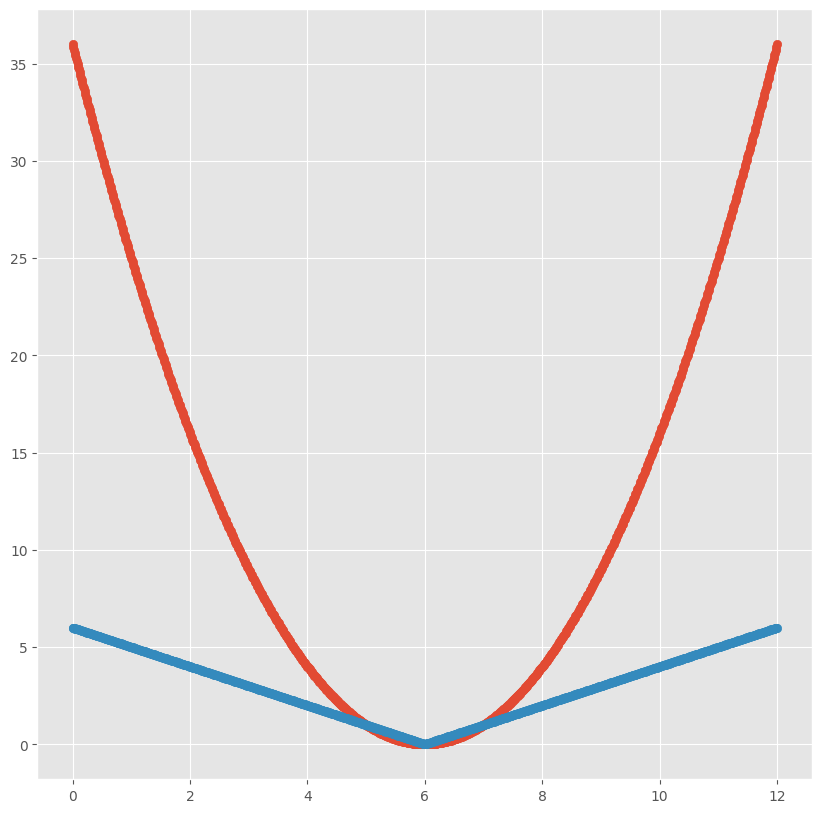

In [ ]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
plt.figure(figsize=(10, 10))

measurements = np.linspace(0, 12, 1000)
plt.scatter(measurements, (measurements - 6) ** 2, label='Squared Error')
plt.scatter(measurements, abs(measurements - 6), label='Absolute Error')
plt.show()

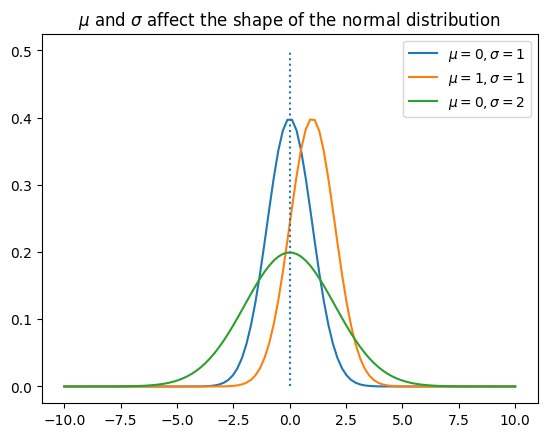

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
x = np.linspace(-10, 10, 100)
f1 = norm.pdf(x, loc=0, scale=1)
f2 = norm.pdf(x, loc=1, scale=1)
f3 = norm.pdf(x, loc=0, scale=2)
plt.plot(x, f1, label="$\mu=0, \sigma=1$")
plt.plot(x, f2, label="$\mu=1, \sigma=1$")
plt.plot(x, f3, label="$\mu=0, \sigma=2$")
plt.vlines(x=0, ymin=0, ymax=0.5, linestyles="dotted")
plt.legend()
plt.title("$\mu$ and $\sigma$ affect the shape of the normal distribution")
plt.show()


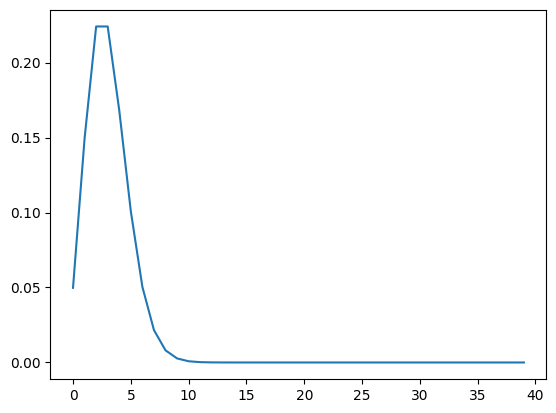

In [ ]:
from scipy.stats import poisson
bins = np.arange(0, 40)
p_pois = poisson.pmf(bins, mu=3)
plt.plot(bins, p_pois)

(array([ 2., 15., 48., 88., 98., 80., 39., 20.,  8.,  2.]),
 array([1.9 , 2.14, 2.38, 2.62, 2.86, 3.1 , 3.34, 3.58, 3.82, 4.06, 4.3 ]),
 <BarContainer object of 10 artists>)

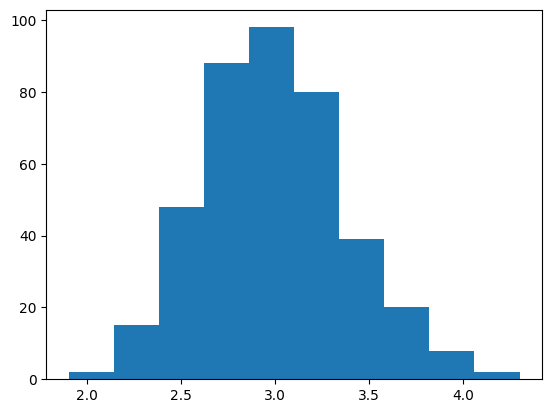

In [ ]:
from scipy.stats import poisson
def sample_pois(_):
    samples = poisson.rvs(mu=3, size=20)
    return np.mean(samples)

means = list(map(sample_pois, np.arange(400)))
plt.hist(means)

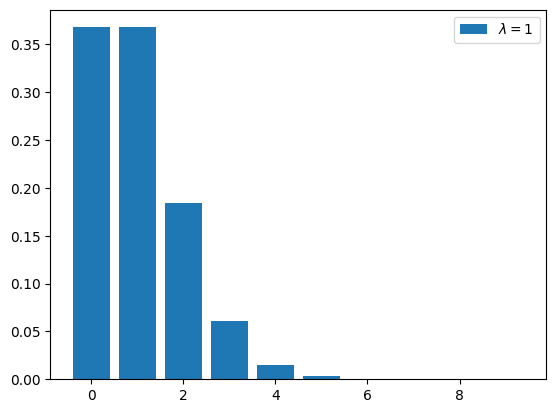

In [ ]:
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)

plt.bar(x, f1, label="$\lambda=1$")
plt.legend()

2.9885910238149727

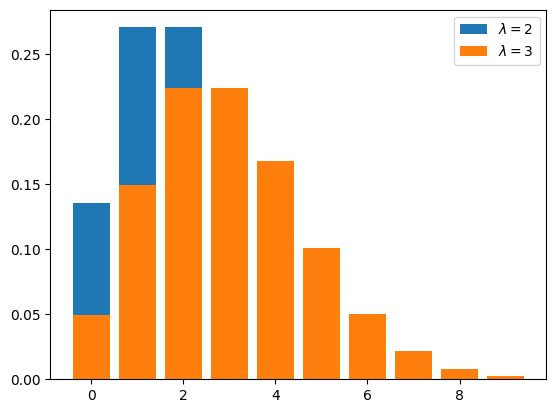

In [ ]:
from scipy.stats import poisson
x = np.arange(10)
f1 = poisson.pmf(x, mu=1)
f2 = poisson.pmf(x, mu=2)
f3 = poisson.pmf(x, mu=3)
x @ f1
plt.bar(x, f2, label="$\lambda=2$")
plt.legend()
x @ f2
plt.bar(x, f3, label="$\lambda=3$")
plt.legend()
x@f3